In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2


import os

os.environ["SYSTEM_MEMORY"] = "16gb"

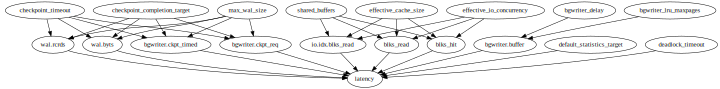

In [31]:
import networkx as nx
from IPython.core.display import SVG, display


from networkx.drawing.nx_agraph import graphviz_layout




def draw(graph, path = None):

    fmt = "svg"
    if path is not None:
        if path.endswith(".svg"):
            fmt = "svg"
        elif path.endswith(".pdf"):
            fmt = "pdf"
        else:
            print("Unrecognized file extension", path.split(".")[-1])
    svg = nx.nx_agraph.to_agraph(graph).draw(path = path, prog = "dot", format = fmt, args="-Gsize=10")
    if path is None:
        display(SVG(svg))

G = nx.read_edgelist("postgres.edgelist", create_using=nx.DiGraph)
# display(SVG(nx.nx_agraph.to_agraph(G).draw(prog = "dot", format='svg', args="-Gsize=10")))


draw(G)

In [30]:
from autorocks.optimizer.bograph.bobn import BoBn
from autorocks.envs.postgres.schema import PostgresParametersCollection10

output_path = "/Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/BoGraphEval/figures/postgres"
param_space = PostgresParametersCollection10()
bobn_graph = BoBn(G, param_space, {"latency"})

for (i, subgraph) in enumerate(bobn_graph._subgraphs):
    draw(G.subgraph(subgraph._subgraph), f"{output_path}/subgraph_{i}.pdf")
    draw(G.subgraph(subgraph._subgraph), f"{output_path}/subgraph_{i}.svg")
    
draw(G, f"{output_path}/postgres_dag.pdf")
draw(G, f"{output_path}/postgres_dag.svg")


In [29]:
bobn_graph._subgraphs

[BoBnGraph(), BoBnGraph(), BoBnGraph(), BoBnGraph()]